# Introduction

## ITL-Interview task : Image classification

### Problem Statement

If you had 10,000 pictures of oranges and 1,000 pictures of apples, implement a simple pipeline for classifying these images.

# Step 1: Environment Setup and Data Loading

## 1.1 Install Dependencies

In [153]:
!pip install tensorflow opencv-python

  Obtaining dependency information for keras<2.16,>=2.15.0 from https://files.pythonhosted.org/packages/fc/a7/0d4490de967a67f68a538cc9cdb259bff971c4b5787f7765dc7c8f118f71/keras-2.15.0-py3-none-any.whl.metadata
  Using cached keras-2.15.0-py3-none-any.whl.metadata (2.4 kB)
Using cached keras-2.15.0-py3-none-any.whl (1.7 MB)
  Attempting uninstall: keras
    Found existing installation: keras 3.0.5
    Uninstalling keras-3.0.5:
      Successfully uninstalled keras-3.0.5


In [176]:
# Import relavant libraries


import os
from matplotlib import pyplot as plt

# image data preprocessing libarires
import cv2
# from PIL import Image


# Data loading
import numpy as np

# deep learning libaries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

# Performance evaluation libraries
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

# Model deployment libraries
from tensorflow.keras.models import load_model


## 1.2 Image Data Instantiation

In [34]:
# instantiate the image director
image_dir = 'data'

# Display the list of directories in the image_dir
os.listdir(image_dir)

['apples', 'oranges']

## 1.3 Initial Data Pre-processing

In [55]:
# Remove images with inappropriate image extentions

def remove_inappropriate_images(directory, image_extensions):
    for root, dirs, files in os.walk(directory):
        for file in files:
            # Remove spaces from the file name
            new_file_name = file.replace(" ", "").replace("(", "").replace(")", "")
            file_path = os.path.join(root, file)
            new_file_path = os.path.join(root, new_file_name)

            # Check file extension and remove if inappropriate
            _, file_extension = os.path.splitext(file)
            if file_extension.lower() not in image_extensions:
                os.remove(file_path)
    
            elif file != new_file_name:
                os.rename(file_path, new_file_path)
                

In [56]:
# In appropriate iamge function Call

# Define suitable image extensions
image_exts = ['.jpeg','.jpg','.bmp','.png']

remove_inappropriate_images(image_dir, image_exts)

In [72]:
# lets view an image using the openCV libriary

view_image = cv2.imread(os.path.join(image_dir,'apples', 'shopping1.jpeg'))


In [73]:
view_image.shape

(460, 460, 3)

The shape of the image **shopping1.jpeg** tells us that the image is made of 460 pixels high and 460 pixels wide with a channel of 3 which indicates the image is colored.

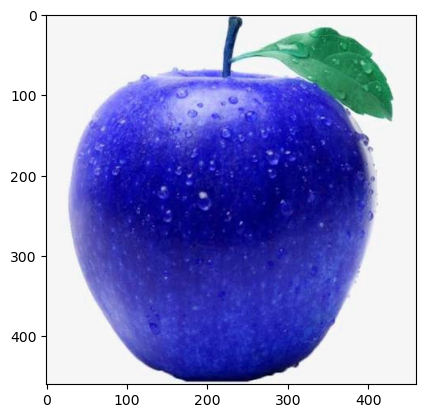

In [74]:
# lets visualize the image
plt.imshow(view_image)

## 1.4 Data Loading

In [81]:
image_data = tf.keras.utils.image_dataset_from_directory(image_dir)

Found 325 files belonging to 2 classes.


In [83]:
# Convert the image_data into a numpy iterator in order to access the it
image_data_iterator = image_data.as_numpy_iterator()

In [84]:
# Fetch image batches
image_batch = image_data_iterator.next()


In [91]:
# Shape of images representation
image_batch[0].shape

(32, 256, 256, 3)

In [93]:
# image labels from batch
# Class 0 = Apples
# Class 1 = Oranges
image_batch[1]

array([0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 1])

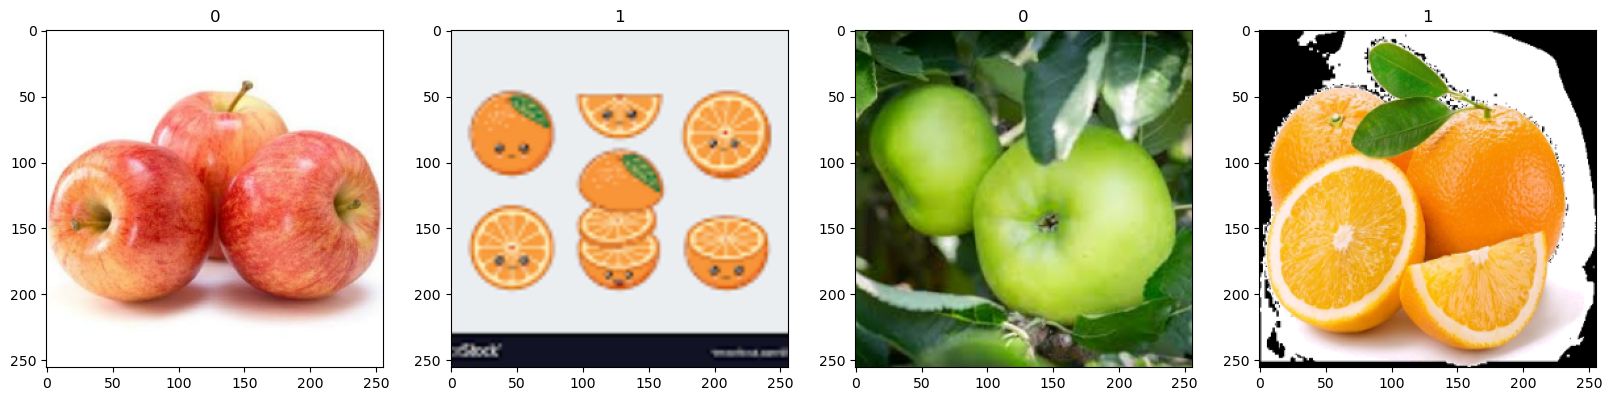

In [95]:
# Identify the image label associations using.

fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(image_batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(image_batch[1][idx])

**0** label is assigned to apples and **1** lable is assigned to oranges from the visualization

# Step 2: Data Pre-processing

## 2.1 Normalize the data

In [96]:
image_data = image_data.map(lambda x, y: (x/255, y))

In [101]:
image_data.as_numpy_iterator().next()[0].max()

1.0

## 2.2 Split Data

In [103]:
# Check the lenght of the image date
len(image_data)

11

In [109]:
train_size = int(len(image_data) * .7)
val_size = int(len(image_data) * .2)
test_size = int(len(image_data) * .1) +1

In [117]:
train_size + val_size + test_size

11

In [118]:
train =image_data.take(train_size)
val = image_data.skip(train_size).take(val_size)
test = image_data.skip(train_size+val_size).take(test_size)

In [121]:
len(test)

2

# Step 3: Deep model

## 3.1 Build Deep Learning Model

In [132]:
# CNN based model using Keras
cnn_model = Sequential()

### Model Architecture
Our model architecture for this simple task will comprise of **3 convolutional layers** with **2 fully connected layers**. <br>
1. The first convolutional layer comprises of **16 filters** with a **kernel of 3x3** and **1 stride** with an input shape of **256 x 256 x 3** and activation function as **ReLu**.
2. 

In [133]:
# First Convolution layer
cnn_model.add(Conv2D(16, (3, 3), 1, activation='relu', input_shape=(256, 256, 3)))
cnn_model.add(MaxPooling2D())

# Second Convulation layer
cnn_model.add(Conv2D(32, (3, 3), 1, activation='relu'))
cnn_model.add(MaxPooling2D())

# Third Convulation layer
cnn_model.add(Conv2D(16, (3, 3), 1, activation='relu'))
cnn_model.add(MaxPooling2D())

# Flatten the results to feed to DNN
cnn_model.add(Flatten())

# First Fully connected layer with 256 neuron hidden layers
cnn_model.add(Dense(256, activation='relu'))

# Second Fully connected layer with 1 output neuron
cnn_model.add(Dense(1, activation='sigmoid'))

### Compile the model

In [137]:
cnn_model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [138]:
cnn_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 30, 30, 16)       

## 3.2 Train

In [141]:
logdir = 'logs'

'logs'

In [155]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [156]:
train_hist = cnn_model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20


7/7 [==============================] - 3s 223ms/step - loss: 0.7849 - accuracy: 0.5982 - val_loss: 0.4140 - val_accuracy: 0.7812
Epoch 2/20
7/7 [==============================] - 2s 208ms/step - loss: 0.3989 - accuracy: 0.8348 - val_loss: 0.3573 - val_accuracy: 0.8750
Epoch 3/20
7/7 [==============================] - 2s 212ms/step - loss: 0.2928 - accuracy: 0.8973 - val_loss: 0.2739 - val_accuracy: 0.9375
Epoch 4/20
7/7 [==============================] - 2s 207ms/step - loss: 0.2201 - accuracy: 0.9152 - val_loss: 0.1681 - val_accuracy: 0.9531
Epoch 5/20
7/7 [==============================] - 2s 206ms/step - loss: 0.1497 - accuracy: 0.9509 - val_loss: 0.1537 - val_accuracy: 0.9375
Epoch 6/20
7/7 [==============================] - 2s 209ms/step - loss: 0.1070 - accuracy: 0.9598 - val_loss: 0.1155 - val_accuracy: 0.9688
Epoch 7/20
7/7 [==============================] - 2s 206ms/step - loss: 0.1149 - accuracy: 0.9688 - val_loss: 0.0327 - val_accuracy: 0.9844
Epoch 8/20
7/7 [==

## 3.3 Plot Performance

In [159]:
def plot_loss(train_loss, val_loss):
    fig, ax = plt.subplots()
    ax.plot(train_loss, color='teal', label='Training Loss')
    ax.plot(val_loss, color='orange', label='Validation Loss')
    
    ax.set_title('Loss', fontsize=20)
    ax.legend(loc="upper left")
    plt.show()


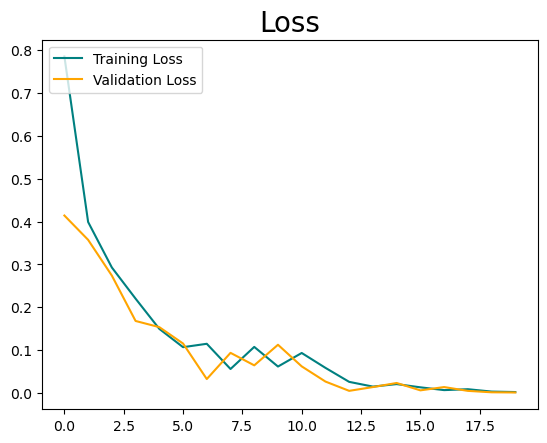

In [160]:
# Plot the loss graph
train_loss_history = train_hist.history['loss']
val_loss_history = train_hist.history['val_loss']
plot_loss(train_loss_history, val_loss_history)

In [161]:
def plot_accuracy(train_accuracy, val_accuracy):
    fig, ax = plt.subplots()
    ax.plot(train_accuracy, color='teal', label='Training Accuracy')
    ax.plot(val_accuracy, color='orange', label='Validation Accuracy')
    
    ax.set_title('Accuracy', fontsize=20)
    ax.legend(loc="upper left")
    plt.show()

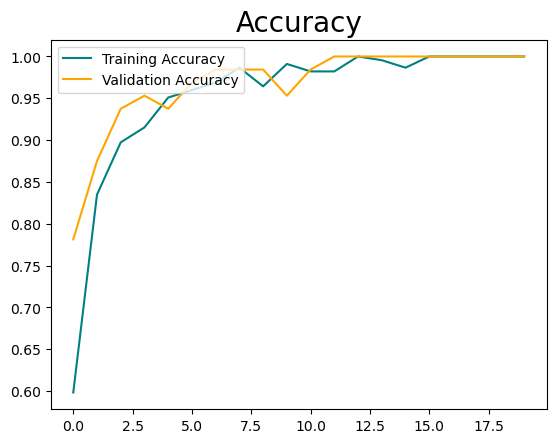

In [162]:
# Plot the accuracy
train_accuracy_history = train_hist.history['accuracy']
val_accuracy_history = train_hist.history['val_accuracy']
plot_accuracy(train_accuracy_history, val_accuracy_history)

# Step 4: Performance Evaluation

## 4.1 Evaluate

In [165]:
# instantiate the performance metrics
pre = Precision()
rec = Recall()
acc = BinaryAccuracy()

In [167]:
for batch in test.as_numpy_iterator():
    X, y = batch
    ypred = cnn_model.predict(X)
    pre.update_state(y, ypred)
    rec.update_state(y, ypred)
    acc.update_state(y, ypred)

precision_result = pre.result()
recall_result = rec.result()
accuracy_result = acc.result()




1/1 [==============================] - 0s 57ms/step


In [168]:
print(f'Precision: {precision_result}, Recall: {recall_result}, Accuracy: {accuracy_result}')


Precision: 1.0, Recall: 1.0, Accuracy: 1.0


## 4.2 Test

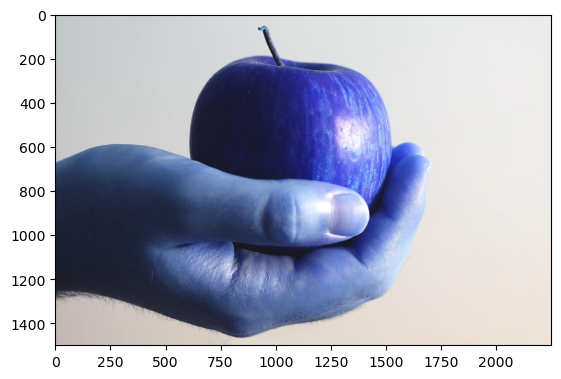

In [169]:
test_image = cv2.imread('apple-test.jpeg')
plt.imshow(test_image)
plt.show()

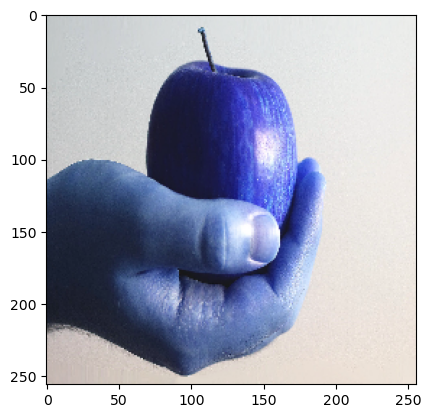

In [187]:
# Test picture size must match the training picture size
resize = tf.image.resize(test_image, (256, 256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [172]:
test_pred = cnn_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 19ms/step


In [173]:
test_pred

array([[0.05059434]], dtype=float32)

In [174]:
if test_pred < 0.5:
    print("apple")
else:
    print("orange")

apple


# Step 5: Model Deployment

In [191]:
# save the model
cnn_model.save(os.path.join('models', 'apple_orange_classifier.keras'))

In [194]:
# load the model
ld_model = load_model(os.path.join('models', 'apple_orange_classifier.keras'))
ld_model

In [195]:
ld_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 52ms/step


array([[0.05059434]], dtype=float32)